### Bog of word model for document:

In BOG  we treat document as collection of word without any order. 

- **Bernoulli document model:** message is represented by a binary feature vector of absence or presence of word.
- **Multinomial document model**: message is represented by an integer feature vector of word frequency.

There are better model for sentence or document representation **where words order matters**. There are model which takes into account the word order like [N-gram](https://en.wikipedia.org/wiki/N-gram) etc.
Infact Deep learning has enabled us to learn better embedding of words using context of words(co occurance).
[**optional** see [GloVe: Global Vectors for Word Representation](https://nlp.stanford.edu/projects/glove/)]

# Count vectorizer

In [1]:
sample_corpus = ['Introduction to count vectorizer for  sentences', 'It count number of word as many times word occurs']

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

en = CountVectorizer()

text_feat = en.fit_transform(sample_corpus)
text_feat
pd.DataFrame(text_feat.toarray(), columns=en.get_feature_names())

,as,count,for,introduction,it,many,number,occurs,of,sentences,times,to,vectorizer,word
0,0,1,1,1,0,0,0,0,0,1,0,1,1,0
1,1,1,0,0,1,1,1,1,1,0,1,0,0,2


# N-gram

N-gram is simply a sequence of word.

- Drinking coffee. (2 gram)
- Have you seen the sky?
- Hard drive encryption.(3 gram) 
- After drinking coffee, he said thank you.(7 gram)
- Drinking water is good quality.

Which of these n-gram occur frequently?

# How can we utilize this idea
- Spell correction
- Next word prediction/suggestion

# n gram model
It is based on assigning probabilities to a word based on its occurrence in a sequence of words.

P(coffee|Drinking) = (No of times "Drinking coffee" )/(No of times Drinking occurs )

In above tiny corpus

P(coffee|Drinking)= 2/3

P(water|Drinking)= 1/3

We can use ngram  in CountVectorizer or any model which relies in counting word or words together

In [3]:
en = CountVectorizer(ngram_range=(2,2))

text_feat = en.fit_transform(sample_corpus)
text_feat
pd.DataFrame(text_feat.toarray(), columns=en.get_feature_names())


,as many,count number,count vectorizer,for sentences,introduction to,it count,many times,number of,of word,times word,to count,vectorizer for,word as,word occurs
0,0,0,1,1,1,0,0,0,0,0,1,1,0,0
1,1,1,0,0,0,1,1,1,1,1,0,0,1,1



# Back to custom loss function

- to implement new idea of learning objective
- to handle class imbalance
- to apply domain knowledge in building model

In [4]:
from sklearn.datasets import load_digits

In [5]:
digit = load_digits()

In [7]:
X = digit.data
y = digit.target
X.shape, y.shape

((1797, 64), (1797,))

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, '0')

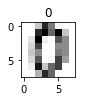

In [13]:
plt.figure(figsize = (1,1))
plt.imshow(X[0].reshape(8,8), cmap= plt.cm.Greys)
plt.title(str(y[0]))

In [18]:
import numpy as np
for i in range(10):
    print(np.sum(y==i))

178
182
177
183
181
182
181
179
174
180


In [50]:
from sklearn.preprocessing import LabelBinarizer
def log_loss(y_true, y_pred, class_weight= [1,3], weight_factor = 1):
    lb = LabelBinarizer()
    y_true_one_hot = lb.fit_transform(y_true)
    y_true_one_hot[:,class_weight]=weight_factor*y_true_one_hot[:,class_weight]
    
    log_loss = -np.sum(np.log(y_pred)*y_true_one_hot)/len(y_true)
    
    return log_loss
    
    
    

In [21]:
from sklearn.metrics import make_scorer

In [51]:
custom_log_loss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

In [43]:
from sklearn.model_selection import GridSearchCV, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV

In [37]:
GridSearchCV()

(1797,)

In [44]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= .2, random_state =1)

In [47]:
X_train.shape, y.shape

((1437, 64), (1797,))

In [52]:
clf= LogisticRegressionCV(cv=5, scoring=custom_log_loss, multi_class='multinomial', max_iter=200)

In [53]:
clf.fit(X_train, y_train)

/media/psnegi/psn/du/teaching/teach_2019/data_science_tools2/dst2_env/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/media/psnegi/psn/du/teaching/teach_2019/data_science_tools2/dst2_env/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/media/psnegi/psn/du/teaching/teach_2019/data_science_tools2/dst2_env/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/media/psnegi/psn/du/teaching/teach_2019/data_science_tools2/dst2_env/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterat

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=200,
           multi_class='multinomial', n_jobs=None, penalty='l2',
           random_state=None, refit=True,
           scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True),
           solver='lbfgs', tol=0.0001, verbose=0)

In [54]:
y_test_pred_prob= clf.predict_proba(X_test)

In [55]:
y_test_pred_prob

array([[9.66296392e-07, 9.65756589e-01, 4.10285274e-04, ...,
        2.00802767e-04, 3.31892808e-02, 3.24789522e-05],
       [2.41231650e-04, 3.87926873e-06, 1.16331228e-04, ...,
        4.45669585e-03, 1.09844235e-03, 2.10769925e-04],
       [9.99932141e-01, 7.09768606e-09, 1.22161746e-05, ...,
        1.55929494e-06, 3.38742899e-07, 2.81561472e-08],
       ...,
       [6.26167332e-07, 1.34193650e-04, 3.32385321e-11, ...,
        9.09682518e-06, 2.01580201e-06, 1.00703248e-08],
       [1.62796164e-11, 2.29886220e-05, 9.99946733e-01, ...,
        2.57524468e-08, 8.92258849e-09, 7.16279359e-11],
       [1.06844501e-04, 9.93398548e-07, 1.88860424e-06, ...,
        1.73795377e-05, 7.13698548e-06, 1.72882691e-06]])

In [57]:
y_test

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4, 7, 1,
       8, 6, 0, 9, 6, 1, 3, 7, 5, 9, 8, 3, 2, 8, 8, 1, 1, 0, 7, 9, 0, 0,
       8, 7, 2, 7, 4, 3, 4, 3, 4, 0, 4, 7, 0, 5, 5, 5, 2, 1, 7, 0, 5, 1,
       8, 3, 3, 4, 0, 3, 7, 4, 3, 4, 2, 9, 7, 3, 2, 5, 3, 4, 1, 5, 5, 2,
       5, 2, 2, 2, 2, 7, 0, 8, 1, 7, 4, 2, 3, 8, 2, 3, 3, 0, 2, 9, 9, 2,
       3, 2, 8, 1, 1, 9, 1, 2, 0, 4, 8, 5, 4, 4, 7, 6, 7, 6, 6, 1, 7, 5,
       6, 3, 8, 3, 7, 1, 8, 5, 3, 4, 7, 8, 5, 0, 6, 0, 6, 3, 7, 6, 5, 6,
       2, 2, 2, 3, 0, 7, 6, 5, 6, 4, 1, 0, 6, 0, 6, 4, 0, 9, 3, 8, 1, 2,
       3, 1, 9, 0, 7, 6, 2, 9, 3, 5, 3, 4, 6, 3, 3, 7, 4, 9, 2, 7, 6, 1,
       6, 8, 4, 0, 3, 1, 0, 9, 9, 9, 0, 1, 8, 6, 8, 0, 9, 5, 9, 8, 2, 3,
       5, 3, 0, 8, 7, 4, 0, 3, 3, 3, 6, 3, 3, 2, 9, 1, 6, 9, 0, 4, 2, 2,
       7, 9, 1, 6, 7, 6, 3, 7, 1, 9, 3, 4, 0, 6, 4, 8, 5, 3, 6, 3, 1, 4,
       0, 4, 4, 8, 7, 9, 1, 5, 2, 7, 0, 9, 0, 4, 4, 0, 1, 0, 6, 4, 2, 8,
       5, 0, 2, 6, 0, 1, 8, 2, 0, 9, 5, 6, 2, 0, 5,

In [60]:
np.sum((np.argmax(y_test_pred_prob, axis=1)==y_test))/len(y_test)

0.975